---

# Let's practice

Before you start working and playing with the different models that we have seen, we are going to download the dataset with which you are going to work, the titanic dataset, widely known and used in machine learning courses.

For this we are going to do the following:

```python
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic['data'], titanic['target']],
    columns= titanic['feature_names'] + ['target']
)
df_titanic = df_titanic.rename(columns={'target': 'survived'})
```

So using the same dataset (Titanic), you should train 4 models:

* Decision Tree
* SVM
* Random Forest
* Extra: XGBoost

And you should apply the following concepts:

* Train/Test Split.
* Feature engineering.
* GridSearch or RandomSearch with CV.
* Metrics.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic.head()

d:\AnyoneAI\environment\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.55,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


## Exploration

**TODO:** We always have to explore our datasets, so this is not going to be the exception.

**The dataset contains the following columns:**

1. pclass: Passenger's class (1st, 2nd, or 3rd class)
2. name: Passenger's name
3. sex: Passenger's gender (male or female)
4. age: Passenger's age
5. sibsp: Number of siblings/spouses aboard
6. parch: Number of parents/children aboard
7. ticket: Ticket number
8. fare: Fare paid by the passenger
9. cabin: Cabin number where the passenger stayed
10. embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
11. boat: Lifeboat number (if survived)
12. body: Body number (if not survived and body was recovered)
13. home.dest: Home or destination of the passenger
14. survived: Survival status (1 = survived, 0 = not survived)

In [33]:
df_titanic.shape

(1309, 14)

In [34]:
# Check for missing values
print(df_titanic.isnull().sum())

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64


In [35]:
# We display basic information about the dataset
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   object
 1   name       1309 non-null   object
 2   sex        1309 non-null   object
 3   age        1046 non-null   object
 4   sibsp      1309 non-null   object
 5   parch      1309 non-null   object
 6   ticket     1309 non-null   object
 7   fare       1308 non-null   object
 8   cabin      295 non-null    object
 9   embarked   1307 non-null   object
 10  boat       486 non-null    object
 11  body       121 non-null    object
 12  home.dest  745 non-null    object
 13  survived   1309 non-null   object
dtypes: object(14)
memory usage: 143.3+ KB
None


It looks like the data types for some columns are currently listed as object instead of the appropriate data types. This could lead to issues when performing calculations and visualizations. Let's address this issue by converting the columns to their appropriate data types and then we proceed with the analysis. 

In [36]:
numeric_cols = ["pclass", "age", "sibsp", "parch", "fare", "survived"]
for col in numeric_cols:
    df_titanic[col] = pd.to_numeric(df_titanic[col], errors="coerce")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    object 
 12  home.dest  745 non-null    object 
 13  survived   1309 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 143.3+ KB


In [37]:
# Summary statistics
df_titanic.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


From the above summary we can conclude that, the variable 'age' has more than 200 missing values. In addition, thanks to the .info function we can observe that, in 'fare' we only have one missing value and in 'embarked' two. The variables 'cabin', 'boat', 'body' and 'home.dest' have in general more than 900 missing values. Finally, we note that the minimum age is 0.16, which would be equivalent to a child almost 2 months old. According to the [information on the victims of the catastrophe](https://titanicfacts.net/titanic-victims/) does not correspond to any data. We assume that some data were entered for educational purposes.

In [38]:
def count_plot_fc(df, col_name, split=None, barsplit=None):
    """
    Creates countplots and barplots of the specified feature
    (with options to split the columns) and generates the
    corresponding table of counts and percentages.

    Parameters
    ----------
    df : DataFrame
        Dataset for plotting.
    col_name : string
        Name of column/feature in "data".
    countsplit : string
        Use countsplit to specify the "hue" argument of the countplot.
    barsplit: string
        Use barsplit to specify the "hue" argument of the barplot.
    """

    if (split is not None) and (barsplit is not None):
        col_count1 = df[[col_name]].groupby(by=col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count1, "Percentage": col_perc1})

        col_count2 = df[[col_name, split]].groupby(by=[col_name, split]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({"Count": col_count2, "Percentage": col_perc2})
        display(tcount1, tcount2)

        figc, axc = plt.subplots(1, 2, figsize=(10, 4))
        sns.countplot(data=df, x=col_name, hue=None, ax=axc[0])
        sns.countplot(data=df, x=col_name, hue=split, ax=axc[1])

        figb, axb = plt.subplots(1, 2, figsize=(10, 4))
        sns.barplot(data=df, x=col_name, y="survived", hue=None, ax=axb[0])
        sns.barplot(data=df, x=col_name, y="survived", hue=barsplit, ax=axb[1])

    elif split is not None:
        col_count1 = df[[col_name]].groupby(by=col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count1, "Percentage": col_perc1})

        col_count2 = df[[col_name, split]].groupby(by=[col_name, split]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({"Count": col_count2, "Percentage": col_perc2})
        display(tcount1, tcount2)

        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        sns.countplot(data=df, x=col_name, hue=None, ax=axes[0])
        sns.countplot(data=df, x=col_name, hue=split, ax=axes[1])

    else:
        col_count = df[[col_name]].groupby(by=col_name).size()
        col_perc = col_count.apply(lambda x: x / sum(col_count) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count, "Percentage": col_perc})
        display(tcount1)

        sns.countplot(data=df, x=col_name)

,Count,Percentage
survived,,
0,809,61.8
1,500,38.2


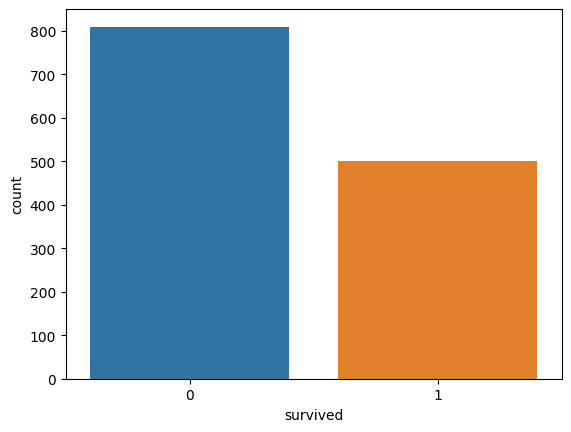

In [39]:
count_plot_fc(df=df_titanic, col_name="survived")

,Count,Percentage
pclass,,
1.0,323,24.7
2.0,277,21.2
3.0,709,54.2


Count  Percentage
pclass survived                   
1.0    0           123         9.4
       1           200        15.3
2.0    0           158        12.1
       1           119         9.1
3.0    0           528        40.3
       1           181        13.8

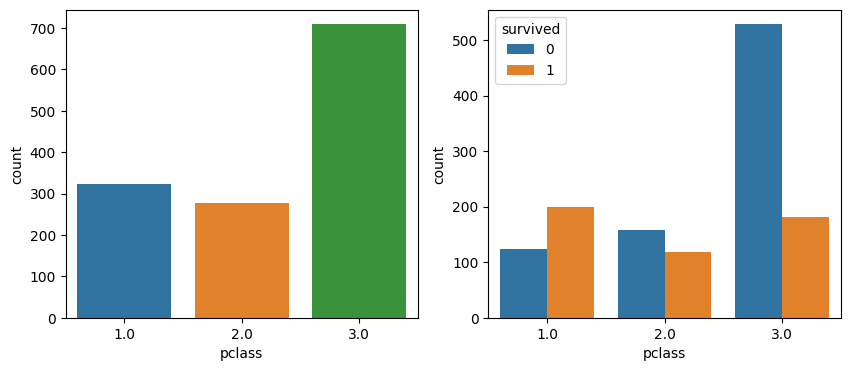

In [40]:
count_plot_fc(df=df_titanic, col_name="pclass", split="survived")

,Count,Percentage
pclass,,
1.0,323,24.7
2.0,277,21.2
3.0,709,54.2


Count  Percentage
pclass survived                   
1.0    0           123         9.4
       1           200        15.3
2.0    0           158        12.1
       1           119         9.1
3.0    0           528        40.3
       1           181        13.8

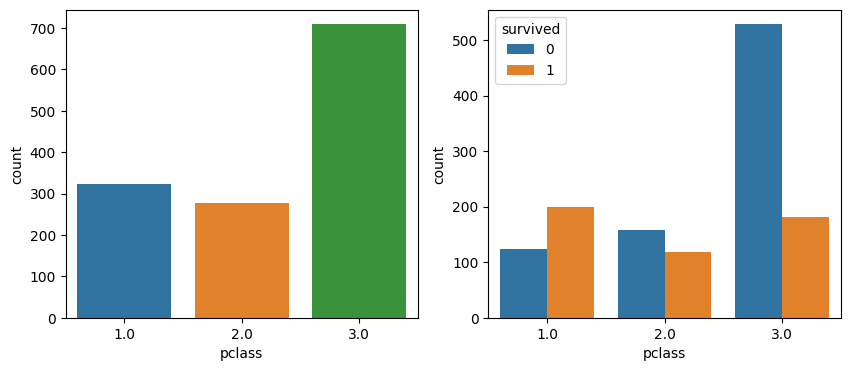

In [41]:
count_plot_fc(df=df_titanic, col_name="pclass", split="survived")

,Count,Percentage
sex,,
female,466,35.6
male,843,64.4


Count  Percentage
sex    survived                   
female 0           127         9.7
       1           339        25.9
male   0           682        52.1
       1           161        12.3

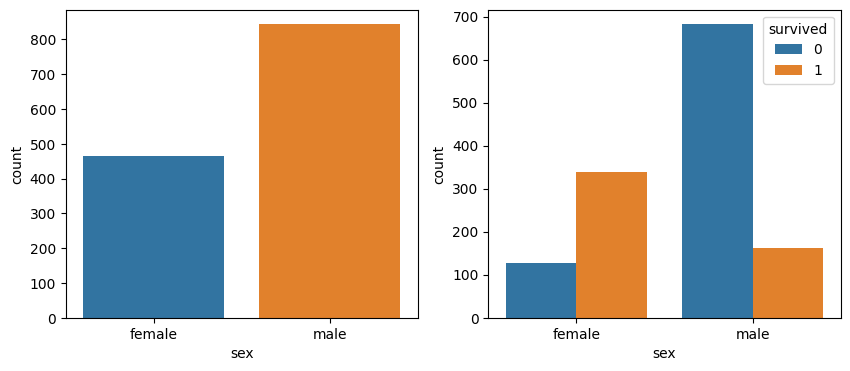

In [42]:
count_plot_fc(df=df_titanic, col_name="sex", split="survived")

,Count,Percentage
sex,,
female,466,35.6
male,843,64.4


Count  Percentage
sex    pclass                   
female 1.0       144        11.0
       2.0       106         8.1
       3.0       216        16.5
male   1.0       179        13.7
       2.0       171        13.1
       3.0       493        37.7

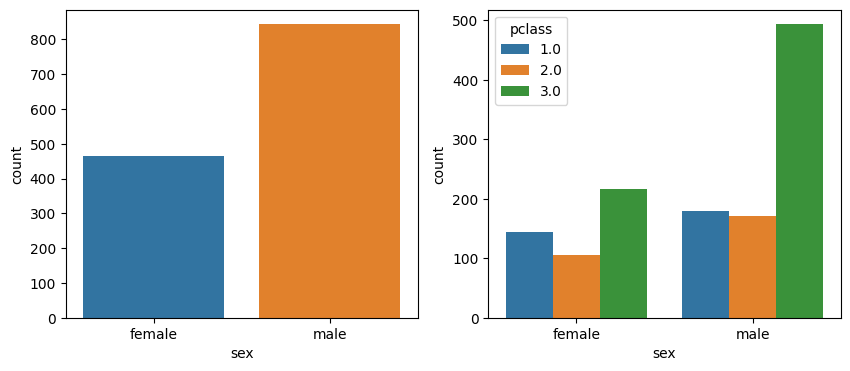

In [43]:
count_plot_fc(df=df_titanic, col_name="sex", split="pclass")

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked survived                   
C        0           120         9.2
         1           150        11.5
Q        0            79         6.0
         1            44         3.4
S        0           610        46.7
         1           304        23.3

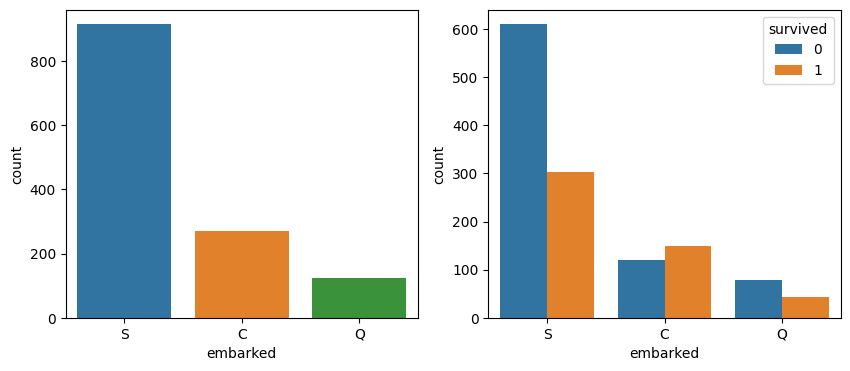

In [44]:
count_plot_fc(df=df_titanic, col_name="embarked", split="survived")

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked sex                      
C        female    113         8.6
         male      157        12.0
Q        female     60         4.6
         male       63         4.8
S        female    291        22.3
         male      623        47.7

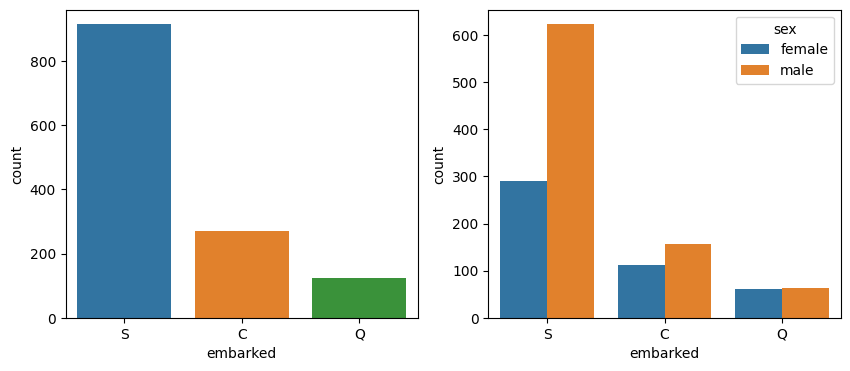

In [45]:
count_plot_fc(df=df_titanic, col_name="embarked", split="sex")

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked pclass                   
C        1.0       141        10.8
         2.0        28         2.1
         3.0       101         7.7
Q        1.0         3         0.2
         2.0         7         0.5
         3.0       113         8.6
S        1.0       177        13.5
         2.0       242        18.5
         3.0       495        37.9

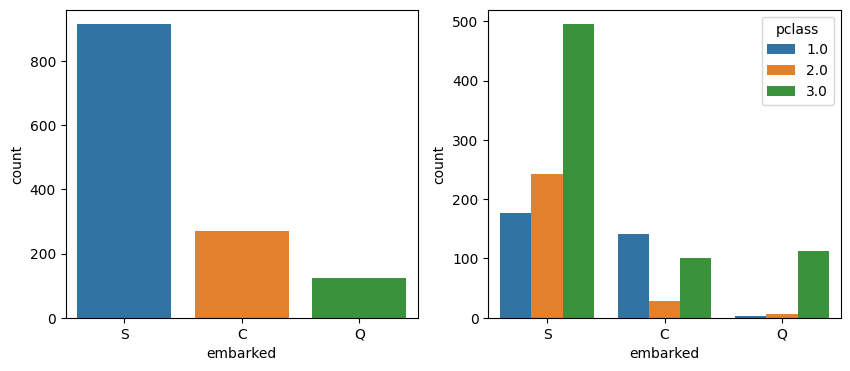

In [46]:
count_plot_fc(df=df_titanic, col_name="embarked", split="pclass")

,Count,Percentage
sibsp,,
0.0,891,68.1
1.0,319,24.4
2.0,42,3.2
3.0,20,1.5
4.0,22,1.7
5.0,6,0.5
8.0,9,0.7


Count  Percentage
sibsp survived                   
0.0   0           582        44.5
      1           309        23.6
1.0   0           156        11.9
      1           163        12.5
2.0   0            23         1.8
      1            19         1.5
3.0   0            14         1.1
      1             6         0.5
4.0   0            19         1.5
      1             3         0.2
5.0   0             6         0.5
8.0   0             9         0.7

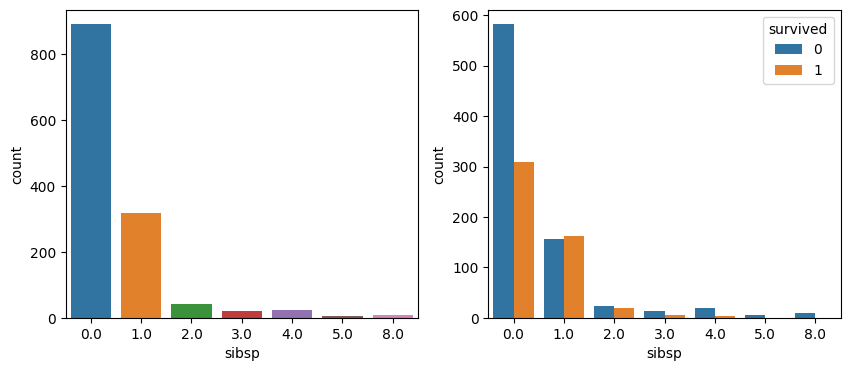

In [47]:
count_plot_fc(df=df_titanic, col_name="sibsp", split="survived")

,Count,Percentage
parch,,
0.0,1002,76.5
1.0,170,13.0
2.0,113,8.6
3.0,8,0.6
4.0,6,0.5
5.0,6,0.5
6.0,2,0.2
9.0,2,0.2


Count  Percentage
parch survived                   
0.0   0           666        50.9
      1           336        25.7
1.0   0            70         5.3
      1           100         7.6
2.0   0            56         4.3
      1            57         4.4
3.0   0             3         0.2
      1             5         0.4
4.0   0             5         0.4
      1             1         0.1
5.0   0             5         0.4
      1             1         0.1
6.0   0             2         0.2
9.0   0             2         0.2

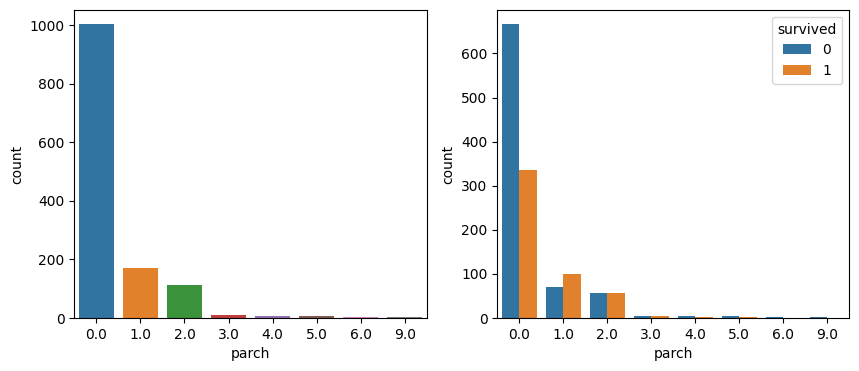

In [48]:
count_plot_fc(df=df_titanic, col_name="parch", split="survived")

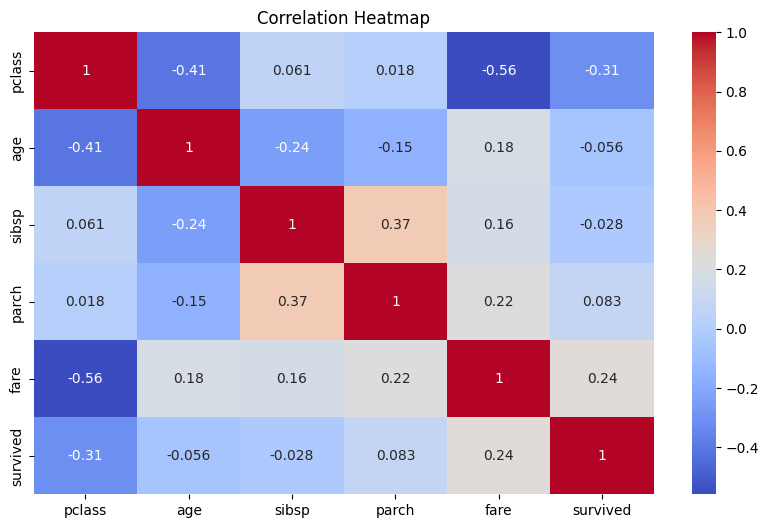

In [49]:
# Correlation heatmap (excluding non-numeric columns)
numeric_df = df_titanic[numeric_cols]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

**TODO:** 
    
* Fill in the missing values using any criteria that you consider appropriate.
* Eliminate those features that you consider necessary.
* Format categorical features, using Label and/or Hot encoder.

In [50]:
df = df_titanic.copy()

In [51]:
median_age = df["age"].median()
df["age"].fillna(median_age, inplace=True)

median_fare = df["fare"].median()
df["fare"].fillna(median_fare, inplace=True)

mode_embarked = df["embarked"].mode()[0]
df["embarked"].fillna(mode_embarked, inplace=True)

df["cabin"].fillna("Unknown", inplace=True)

columns_to_drop = ["boat", "body", "home.dest"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
columns_to_drop = ["name", "ticket"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["sex"] = label_encoder.fit_transform(df["sex"])
df["embarked"] = label_encoder.fit_transform(df["embarked"])

df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

In [52]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [53]:
# Fill missing age values with the median age
median_age = df_titanic["age"].median()
df_titanic["age"].fillna(median_age, inplace=True)

# Fill missing fare values with the median fare
median_fare = df_titanic["fare"].median()
df_titanic["fare"].fillna(median_fare, inplace=True)

# Fill missing embarked values with the mode (most frequent value)
mode_embarked = df_titanic["embarked"].mode()[0]
df_titanic["embarked"].fillna(mode_embarked, inplace=True)

# Fill missing cabin values with a special category or 'Unknown'
df_titanic["cabin"].fillna("Unknown", inplace=True)

# Drop columns with a high percentage of missing values (e.g., 'boat', 'body', 'home.dest')
columns_to_drop = ["boat", "body", "home.dest"]
df_titanic.drop(columns=columns_to_drop, inplace=True)

In [54]:
df_titanic.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [55]:
# Eliminate Unnecessary Features:
columns_to_drop = ["name", "ticket"]
df_titanic.drop(columns=columns_to_drop, inplace=True)

## Hyperparameter Optimization

**TODO:**

* Split the dataset into 80% train and 20% test.
* Using GridSearchCV or RandomSearchCV, tests different hyperparameter values for each model and chooses the best model from each of them.
* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

## Metrics

**TODO:**

* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

---

# Pipeline with ColumnTransformer and GridSearchCV

Only toy datasets like the __iris dataset__ will contain only numeric data, as we saw in the previous exercise, the __titanic dataset__ had a variety of different data types and not just numeric data.

By having different types of data we will not be able to apply the same transformations to each of them, instead we will have to apply different transformations depending on the type of data.

Next we are going to see an example of how to use __ColumnTransformer__ to simplify the application of these different transformations and above all to be able to insert it into a __Pipeline__.

Let’s use the toy dataset, which contains both numerical and categorical data, and apply:

* Normalize the Income column with MinMaxScaler()
* Encode Categorical Columns with OneHotEncoder()
* Group the Age column with binning.

In [56]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic = df_titanic[["sex", "cabin", "age", "fare", "survived"]]

df_titanic["age"] = df_titanic["age"].astype("float64")
df_titanic["fare"] = df_titanic["fare"].astype("float64")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1309 non-null   object 
 1   cabin     295 non-null    object 
 2   age       1046 non-null   float64
 3   fare      1308 non-null   float64
 4   survived  1309 non-null   object 
dtypes: float64(2), object(3)
memory usage: 51.3+ KB


d:\AnyoneAI\environment\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [57]:
df_titanic.isna().sum()

sex            0
cabin       1014
age          263
fare           1
survived       0
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Numeric features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ["age", "fare"]),
        ("cat", categorical_transformer, ["sex", "cabin"]),
    ]
)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic.drop("survived", axis=1),
    df_titanic.survived,
    test_size=0.2,
    random_state=0,
)

In [60]:
my_pipe = Pipeline(
    [("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

my_params = {"classifier__max_depth": [2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(my_pipe, my_params, cv=5)
grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)

print(f"Test score: {score}")
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Test score: 0.7977099236641222
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7917521075415812


**TODO:**

Using __ColumnTransformer__ and __Pipeline__, build a pipeline where different transformations are applied to different types of data, you can use the Titanic dataset again. Also, do some research about the [FutureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) method.